<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import regularizers

In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [49]:
model = tf.keras.Sequential()

model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model.add(layers.Dense(500, activation='sigmoid', kernel_regularizer=regularizers.l2(0.000001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(500, activation='sigmoid', kernel_regularizer=regularizers.l2(0.000001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(500, activation='sigmoid', kernel_regularizer=regularizers.l2(0.000001)))
# model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
# # model.add(layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
# model.add(layers.Dropout(0.5))
# # model.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(10))
model.add(layers.Softmax())

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(train_images,
                    train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/100
469/469 [==============================] - 15s 30ms/step - loss: 0.9027 - accuracy: 0.6579 - val_loss: 0.5236 - val_accuracy: 0.8021
Epoch 2/100
469/469 [==============================] - 14s 29ms/step - loss: 0.5370 - accuracy: 0.8068 - val_loss: 0.4594 - val_accuracy: 0.8316
Epoch 3/100
469/469 [==============================] - 14s 29ms/step - loss: 0.4735 - accuracy: 0.8291 - val_loss: 0.4373 - val_accuracy: 0.8391
Epoch 4/100
469/469 [==============================] - 14s 29ms/step - loss: 0.4463 - accuracy: 0.8390 - val_loss: 0.4127 - val_accuracy: 0.8485
Epoch 5/100
469/469 [==============================] - 14s 30ms/step - loss: 0.4229 - accuracy: 0.8472 - val_loss: 0.4009 - val_accuracy: 0.8549
Epoch 6/100
469/469 [==============================] - 14s 29ms/step - loss: 0.4083 - accuracy: 0.8525 - val_loss: 0.3992 - val_accuracy: 0.8545
Epoch 7/100
469/469 [==============================] - 13s 29ms/step - loss: 0.3962 - accuracy: 0.8579 - val_loss: 0.3890 - val_ac

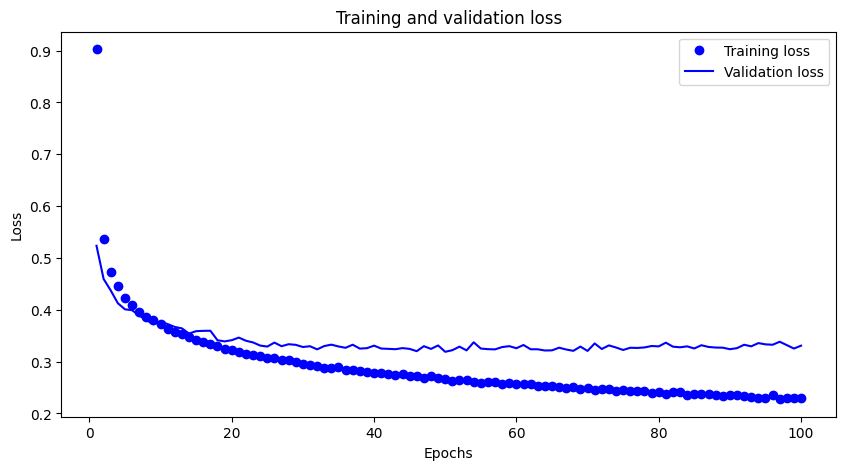

<Figure size 640x480 with 0 Axes>

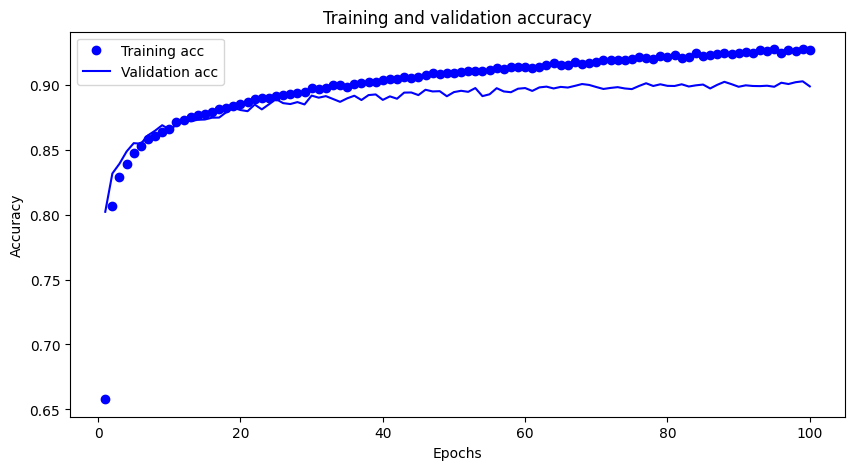

In [52]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [53]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [54]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [55]:
predictions[0]

array([0.08534035, 0.08534035, 0.08534035, 0.08534035, 0.08534035,
       0.08534111, 0.08534035, 0.08536423, 0.08534035, 0.23191223],
      dtype=float32)